# Описание проекта

> Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
> Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы проданных копий)
    - EU_sales — продажи в Европе (миллионы проданных копий)
    - JP_sales — продажи в Японии (миллионы проданных копий)
    - Other_sales — продажи в других странах (миллионы проданных копий)
    - Critic_Score — оценка критиков (максимум 100)
    - User_Score — оценка пользователей (максимум 10)
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

#### Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Посмотрим общую информацию по датафрейму

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


> **1. год выпуска Year_of_Release нужно привести к типу "дата"**  
> **2. User_Score привести к типу float**     

#### Посмотрим пропуски данных

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

> **В основном пропуски в заполнении есть в рейтинге, оценках критиков и пользователей.**

In [6]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


> **В данных по продажам (NA_sales, EU_sales, JP_sales, Other_sales) имеются нулевые значения. Необходимо выяснить почему так произошлою. Возможной причиной может быть то, что игра выпускалась локализовно для одного из рынков (Европа, Северная Америка, Япония) и не получила распостранения на других.**

In [7]:
games.query('NA_sales == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


In [8]:
games.duplicated().sum()

0

> **Дубликатов нет**

## Шаг 2. Подготовьте данные

> - Замените названия столбцов (приведите к нижнему регистру);
> - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
> - Обработайте пропуски при необходимости: 
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
> - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Замените названия столбцов (приведите к нижнему регистру);

In [9]:
games.columns = games.columns.str.lower()

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [10]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Приведем год - year_of_release,  к целому числу и удалим строки с пустывми значениями, т.к их немного, а вручную проставлять для каждого год трудоемко.

In [11]:
games[games['year_of_release'].isnull()].head(20)
# В названия некоторых игр содержится год выпуска, его можно было бы использовать для заполнения столбца year_of_release. 
#Но это не всегда бывает так. Например, есть игра в названии, которой есть 2007, а на самом деле релиз 2006г.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
#### Функция заполнения года

In [13]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

In [14]:
games = games.dropna(subset=['year_of_release'])
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Приведем user_score,  к float

In [16]:
games['user_score'] = games['user_score'].astype('float')
# В строках есть значения tbd. Что означает будет определенн в дальнейшем. Заменим это значение на 0

ValueError: could not convert string to float: 'tbd'

**Обработайте пропуски при необходимости:**
> -Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
> -Опишите причины, которые могли привести к пропускам;  
> -Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать; 

**В строках есть значения tbd. Он означает, что значенеи будет определено в дальнейшем. Заменим это значение на 0**

In [17]:
games['user_score'] = games['user_score'].replace('tbd', 0).astype('float')

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**Определим пропуски в Name и genre. Определим есть ли связь.**            

In [19]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [20]:
# games.isna().query('name == True')[['name', 'genre']]
# Строки с пустыми именем и жанром связаны между собой. Удалим их.

In [21]:
games = games.dropna(subset=['name', 'genre'])

**Проверяем, что строк не осталось.**

In [22]:
games.isna().query('name == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Заполним остальные колонки. Сгруппируем по жанру и заполним средним значением

In [23]:
(
    games
    .pivot_table(index=['genre', 'platform'], 
                 values='critic_score',
                 aggfunc='mean')
)

critic_score
genre    platform              
Action   3DS          62.982759
         DS           58.325926
         GBA          62.176471
         GC           67.917647
         PC           74.248175
...                         ...
Strategy Wii          68.375000
         WiiU         87.000000
         X360         71.894737
         XB           68.000000
         XOne         70.000000

[197 rows x 1 columns]

#### Пустые значения по этим колонкам могли возникнуть из-за непопулярности игр или игровой платформы, на которой они выпускались

In [24]:
games.groupby('genre')['critic_score'].mean().to_frame()

,critic_score
genre,
Action,66.676931
Adventure,65.268750
Fighting,69.155556
Misc,66.648330
Platform,68.124490
Puzzle,67.231818
Racing,68.006897
Role-Playing,72.655267
Shooter,70.260022


In [30]:
games['critic_score'] = games.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))
games['user_score'] = games.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-30-0b7a8d64b07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['critic_score'] = games.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))
<ipython-input-30-0b7a8d64b07a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score'] = games.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))


In [31]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [32]:
games[games['rating'] == "NaN"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Так как рейтинг это качественная характеристика, то заменить его можем только на пустую строку.

In [33]:
games['rating'] = games['rating'].fillna('')

<ipython-input-33-42dbb55b04b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating'] = games['rating'].fillna('')


In [34]:
games.isna().sum()
# Теперь пустых строк нет

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [35]:
games['total_sales'] = games.iloc[:, 4:8].sum(axis=1)

<ipython-input-35-a359f3965e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales'] = games.iloc[:, 4:8].sum(axis=1)


# Вывод:

> **Провели анализ дата фрейма, в ходе которого выяснили:**  
    - Имеются колонки типы, которых не соответсвуют сути. Изменили типы корректные.  
    - Привели к нижнему регистру все столбцы  
    - Проверили на дубликаты. Их не оказалось.   
    - Строки с пустым годом удалили, т.к их небольшое количество  
    - Удалили строки с пустыми названием и жанром, т.к нет возможности их определить.  
    - Заполнили пустые строки в колоки с качественными параметрами,   
    - Выдвинули предположение, что пустые значения по critic_score,	user_score могли возникнуть из-за непопулярности игр или игровой платформы, на которой они выпускались. Заполнили эи значения средними в группировке по жанрам.

# Шаг 3. Проведите исследовательский анализ данных

   > 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?    
   > 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
   > 3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.   
   > 4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.    
   > 5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.    
   > 6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.   
   > 7. Соотнесите выводы с продажами игр на других платформах.  
   > 8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?   

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [36]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

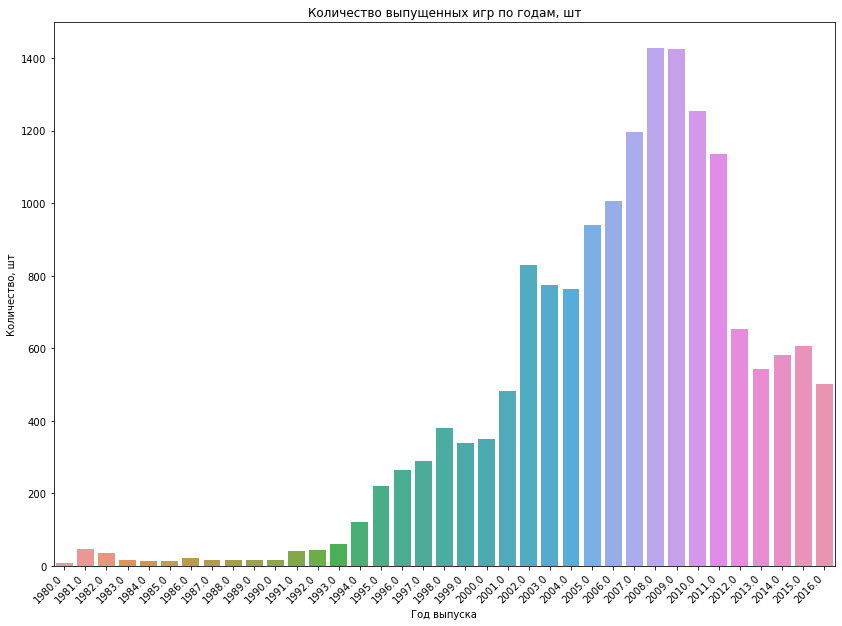

In [37]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=45, ha='right')
sns.countplot(x='year_of_release', data=games)
plt.title('Количество выпущенных игр по годам, шт')
plt.xlabel('Год выпуска')
plt.ylabel('Количество, шт')
plt.show()

#### Начиная с 90-х годов наблюдается рост количества выпущенных игр, пик приходится на 2008-2009 гг.Затем происходит спад. Можно предположить, что рост был обусловлен развитием технологий. Текущий уровень сопотавим с 2001г.

#### Выясним какой из регионов самый большой по объему рынка

In [496]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

0        41.36
1        29.08
2        15.68
3        15.61
4        11.27
         ...  
16710     0.00
16711     0.00
16712     0.00
16713     0.01
16714     0.00
Name: na_sales, Length: 16444, dtype: float64

In [500]:
for region in regions:
    games_revenue_region = games[region].sum()
    print(f'Объем продаж в регионе {region} составляет {games_revenue_region}')

Объем продаж в регионе na_sales составляет 4341.42
Объем продаж в регионе eu_sales составляет 2399.6800000000003
Объем продаж в регионе jp_sales составляет 1290.6399999999999
Объем продаж в регионе other_sales составляет 782.63


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [38]:
most_popular_platforms = games['platform'].value_counts().head().index.tolist()
# Выбрали первые 5 самых популярных платформ и записали их в список
most_popular_platforms

['PS2', 'DS', 'PS3', 'Wii', 'X360']

In [39]:
games.groupby('platform')['total_sales'].max()

platform
2600     7.81
3DO      0.06
3DS     14.60
DC       2.41
DS      29.80
GB      31.38
GBA     15.84
GC       7.06
GEN      6.02
GG       0.04
N64     11.90
NES     40.24
NG       0.25
PC       8.01
PCFX     0.03
PS      10.95
PS2     20.81
PS3     21.05
PS4     14.63
PSP      7.68
PSV      1.96
SAT      1.93
SCD      1.50
SNES    20.62
TG16     0.14
WS       0.51
Wii     82.54
WiiU     7.09
X360    21.82
XB       8.48
XOne     7.39
Name: total_sales, dtype: float64

In [40]:
platform_on_sales= (    
    games
        .pivot_table(index=['platform', 'year_of_release'],
                    values='total_sales',
                    aggfunc='sum')
        .sort_values('total_sales', ascending=False)
        .reset_index()
)
platform_on_sales

,platform,year_of_release,total_sales
0,PS2,2004.0,211.81
1,Wii,2009.0,206.97
2,PS2,2002.0,205.38
3,PS2,2003.0,184.31
4,Wii,2008.0,171.32
...,...,...,...
233,PC,1988.0,0.03
234,PCFX,1996.0,0.03
235,DC,2007.0,0.02
236,3DO,1994.0,0.02


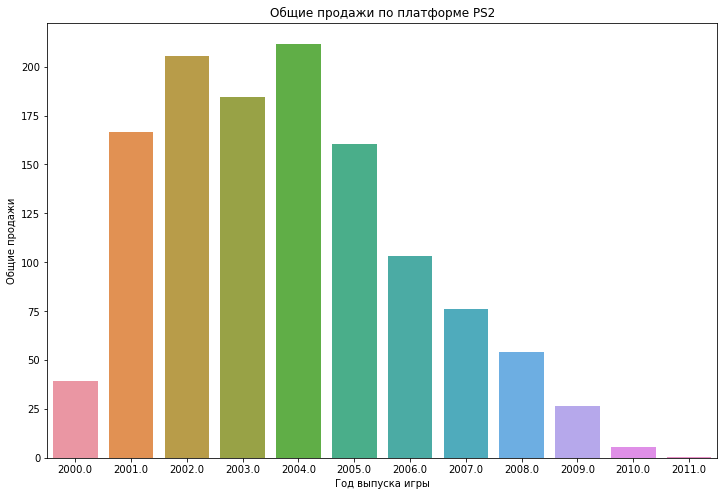

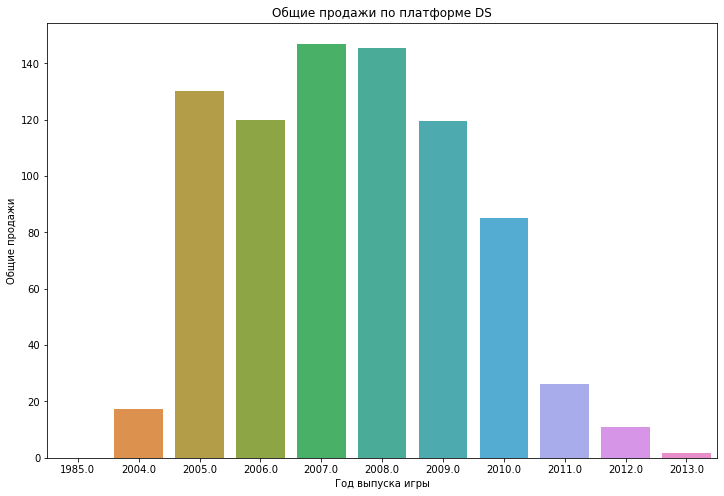

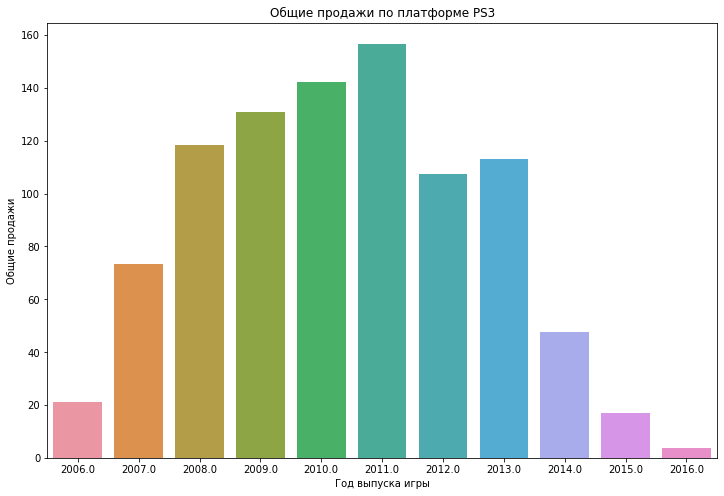

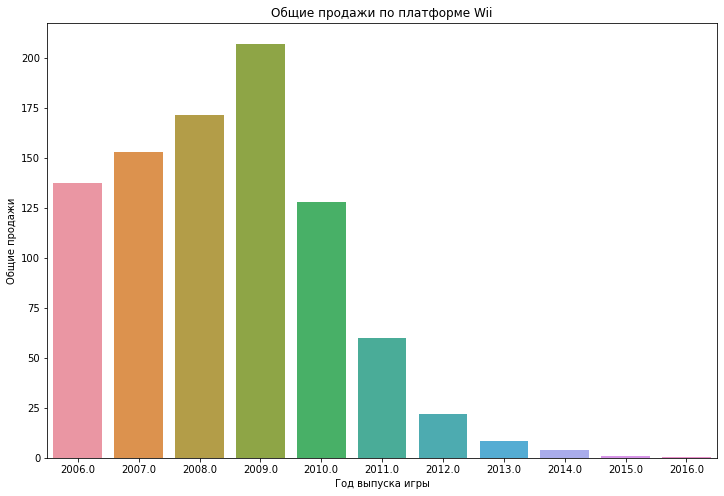

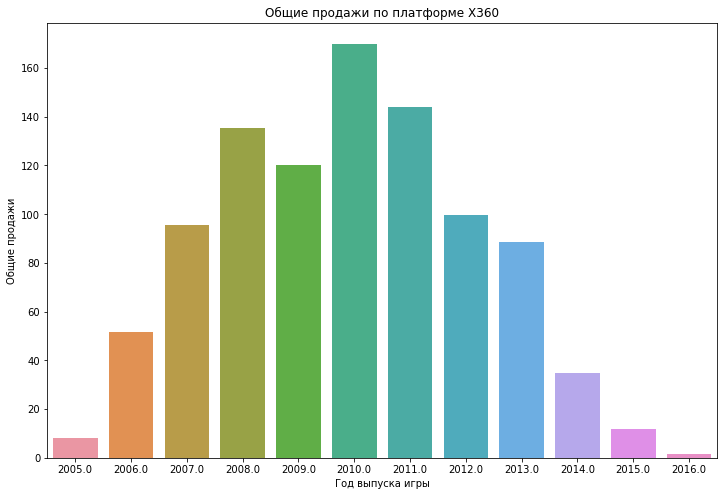

In [41]:
for platform in most_popular_platforms:
    data = platform_on_sales.query('platform == @platform')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='year_of_release', y='total_sales', data=data)
    plt.title('Общие продажи по платформе '+ platform)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Общие продажи')

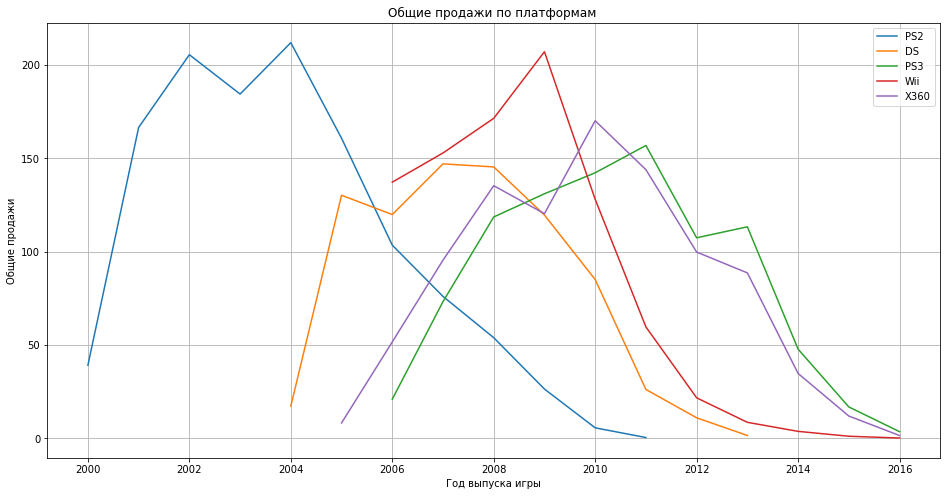

In [42]:
plt.figure(figsize=(16, 8))
for platform in most_popular_platforms:
    data = platform_on_sales.query('platform == @platform and year_of_release > 1999')
    sns.lineplot(x='year_of_release', y='total_sales', data=data)
    plt.title('Общие продажи по платформам ')
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Общие продажи')
    plt.legend(most_popular_platforms)
    plt.grid(True)

#### Приблизительный цикл платформы 10 лет. Максимального объема продаж по всем платформам достигается за 4-7 лет. Затем в течении 2-3 лет наблюдается высокий объем продаж (на уровне максимального), а далее следует значительный спад. Причем падение может достигать десятикратного размера.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

### Так как период выхода на пик продаж является дипазон лет от 5 до7 возмем продажи за 6 лет (среднее). Т.е за период с 2010 по 2016гг

In [44]:
new_data = games.query('year_of_release > = 2010')
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.000000,6.300000,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,72.655267,7.326206,,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,65.268750,4.686344,,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,66.648330,3.359839,,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,66.676931,5.857856,,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,65.268750,4.686344,,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [45]:
new_data_total_price = (
    new_data
            .pivot_table(index='platform',
                        values='total_sales',
                        aggfunc='sum')
            .sort_values('total_sales', ascending=False)

)
new_data_total_price

,total_sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


In [46]:
total_prices_for_years = (
    new_data
            .pivot_table(index=['platform', 'year_of_release'],
                        values='total_sales',
                        aggfunc='sum')
            .sort_values('total_sales', ascending=False)
            .reset_index()

)
total_prices_for_years

,platform,year_of_release,total_sales
0,X360,2010.0,170.03
1,PS3,2011.0,156.78
2,X360,2011.0,143.84
3,PS3,2010.0,142.17
4,Wii,2010.0,127.95
...,...,...,...
60,Wii,2015.0,1.14
61,PS2,2011.0,0.45
62,PSP,2014.0,0.24
63,Wii,2016.0,0.18


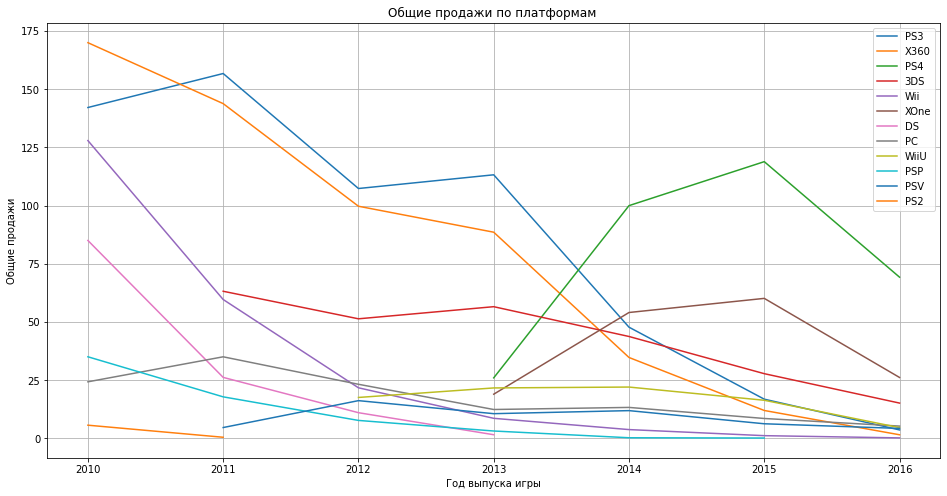

In [47]:
plt.figure(figsize=(16, 8))
for platform in new_data_total_price.index:
    data = total_prices_for_years.query('platform == @platform')
    sns.lineplot(x='year_of_release', y='total_sales', data=data)
    plt.title('Общие продажи по платформам ')
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Общие продажи')
    plt.legend(new_data_total_price.index)
    plt.grid(True)

#### Все платформы имеют тенденцию к падению общих продаж. Возможно это обуславливается распространением мобильных игр. Больше всего упали продажи PS3 и X360, так как на смену этой платформе вышли более новые версии. Менее всего падение затронуло платформы PS4 и XBoxOne, так ка они относительно недавно вышлии на рынок. Лидером по общемировым продажам на 2016 год является платформа PS4. Потенциально прибыльными будем считать PS4, XBoxOne, 3DS, WiiU

In [48]:
profit_platform = ['PS4', 'XOne', '3DS', 'WiiU']

In [49]:
# В новом датасете сделаем срез по годам выпуска (2010-2016) и потенциально прибыльным играм
new_data = games.query('platform == @profit_platform and 2010 <= year_of_release <= 2016 ')

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [50]:
# from matplotlib import rcParams

# # figure size in inches
# rcParams['figure.figsize'] = 20, 10

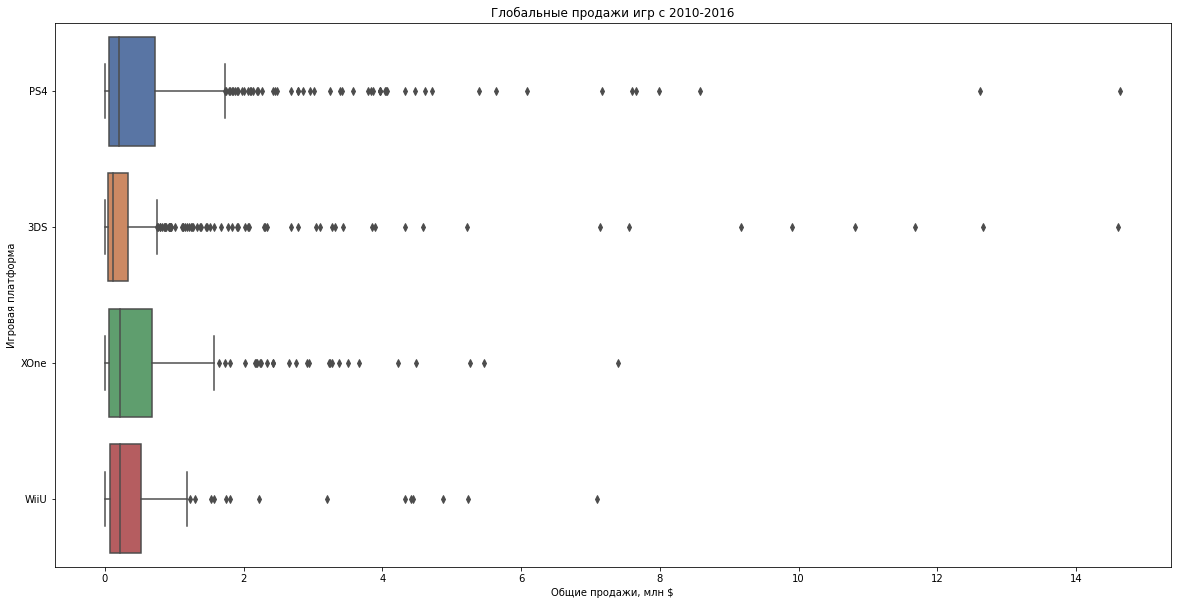

In [51]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='total_sales', 
                 y='platform', 
                 data=new_data, 
                 palette='deep')
plt.title('Глобальные продажи игр c 2010-2016')
plt.xlabel('Общие продажи, млн $')
plt.ylabel('Игровая платформа')
plt.show()

#### На графиках видим большое количество выбросов, которые могут быть обусловлены какими-то флагманскими играми выпущенными на платформе, которые внесли наибольший вклад в продажи

**Построим ящик с усами быз выбросов, со средними по каждой платформе**

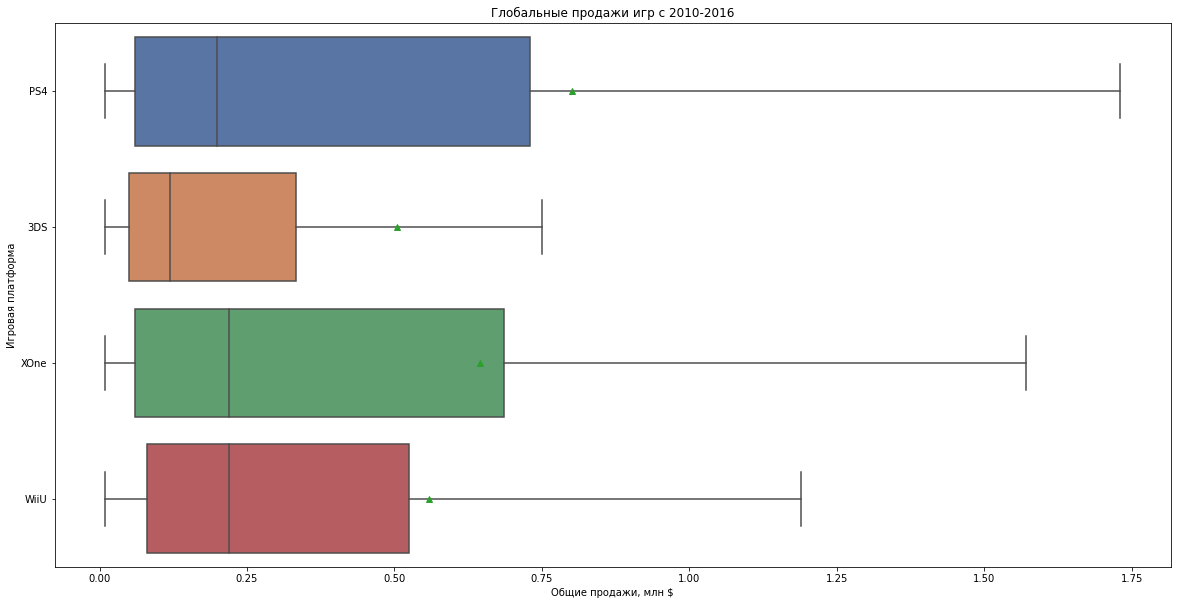

In [52]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='total_sales', 
                 y='platform', 
                 data=new_data, 
                 palette='deep', 
                 showfliers=False, 
                 showmeans=True)
plt.title('Глобальные продажи игр c 2010-2016')
plt.xlabel('Общие продажи, млн $')
plt.ylabel('Игровая платформа')
plt.show()

#### Средние значения на всех платформах значительно разняться, а медианное значение у Xone и WiiU практически идентичны. Недалеко отних находится PS4.

**Посмотрим на игры, которые внесли наибольший вклад в продажи и сравним их по платформам. Разделим на WiiU - 3DS and PS4-Xone**

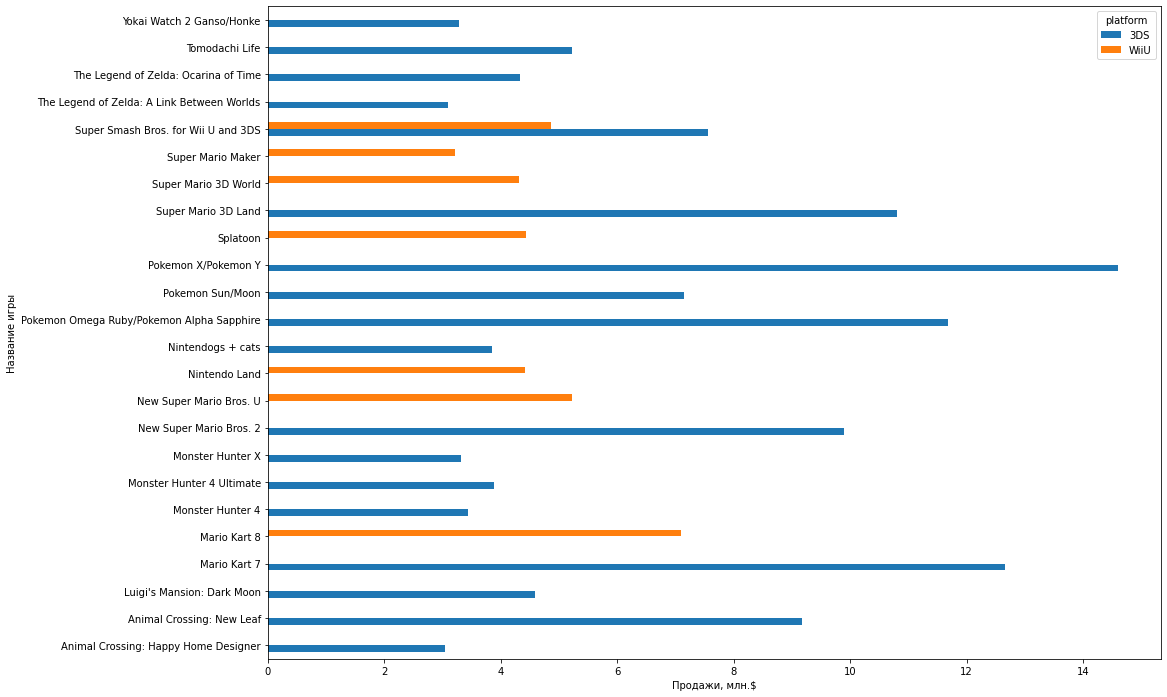

In [53]:
(
    new_data
        .query('total_sales > 3 and platform in ("WiiU","3DS")')
        .pivot_table(index='name', 
                     columns='platform', 
                     values='total_sales', 
                     aggfunc='sum')
        .plot(kind='barh', figsize=(16, 12))
)
plt.xlabel('Продажи, млн.$')
plt.ylabel('Название игры')
plt.show()

#### Так как и 3Ds и WiiU это продукты Nintendo, то видимо производители решилине выпускать одинаковые игры на 2-х платформах, за редким исключением. Например, Super Smash Brothers. Продажи этой игры на 3Ds значительно превышают продажи на WiiU

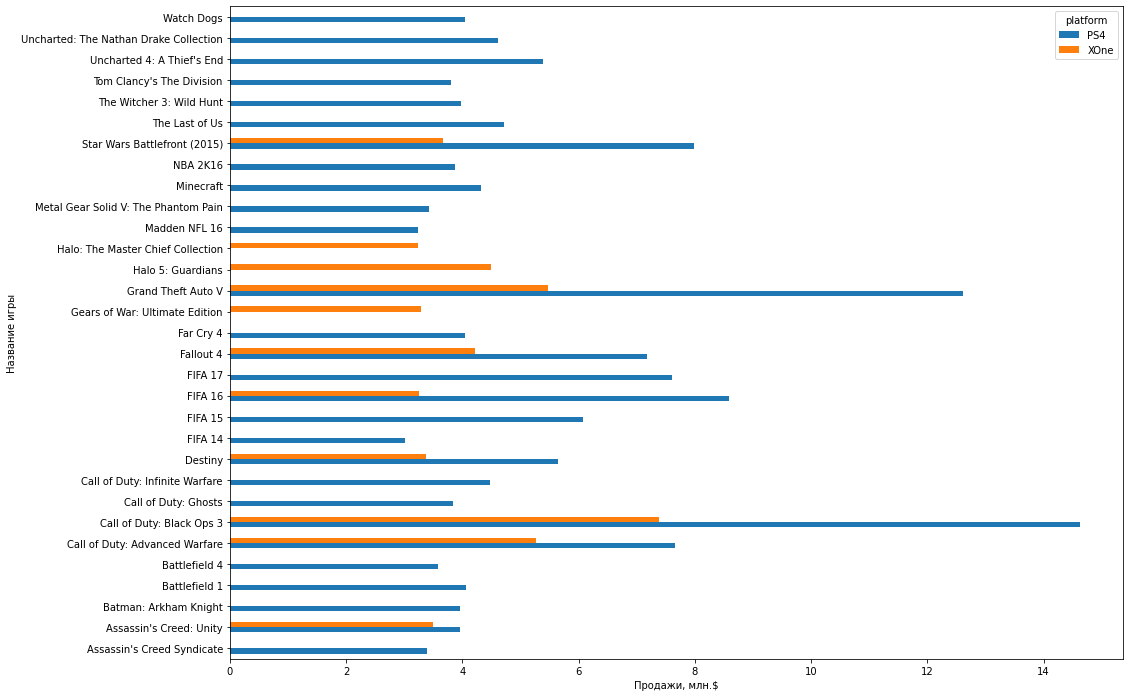

In [54]:
(
    new_data
        .query('total_sales > 3 and platform in ("PS4","XOne")')
        .pivot_table(index='name', 
                     columns='platform', 
                     values='total_sales', 
                     aggfunc='sum')
        .plot(kind='barh', figsize=(16, 12))
)
plt.xlabel('Продажи, млн.$')
plt.ylabel('Название игры')
plt.show()

#### А вот среди конкуриющих компаний было несколько выпущенных игр на оьеих платформах. На основании построенного графика можно сделать вывод, что игра впущенная на PS4 будет популярней, той же игры на XOne. Причем разница во многих случаях в 2 раза. Лидерами продаж являются PS4 и 3DS

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

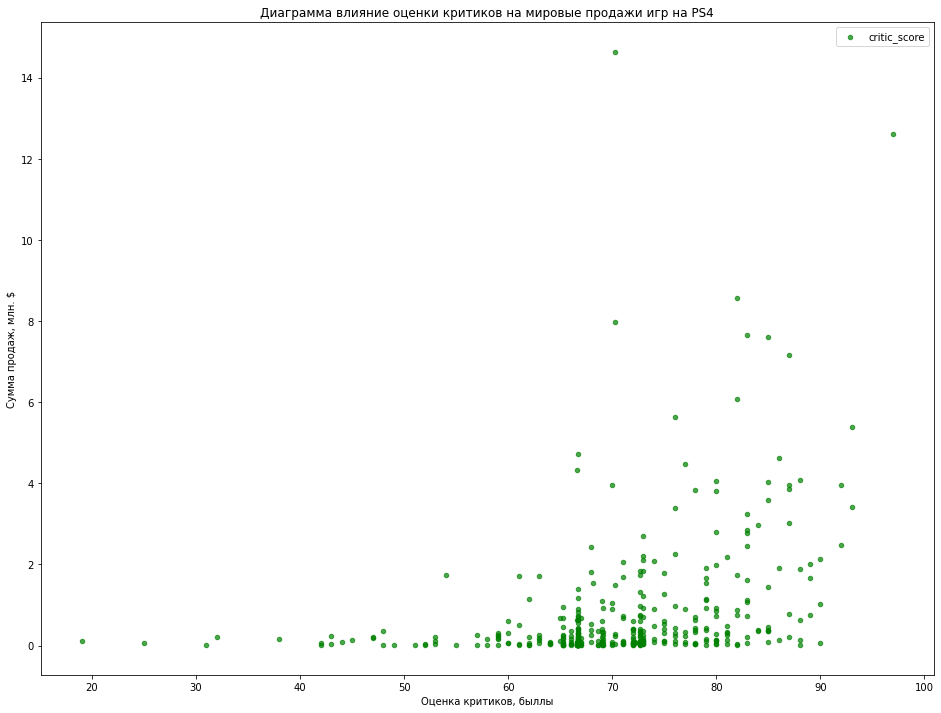

In [130]:

(
    new_data
        .query('platform == "PS4"')
        .plot(kind='scatter', 
              x='critic_score', 
              y='total_sales',
              alpha=.7,
              figsize=(16, 12),
              color='g',
              label='critic_score'
             )

)

plt.title('Диаграмма влияние оценки критиков на мировые продажи игр на PS4')
plt.xlabel('Оценка критиков, быллы')
plt.ylabel('Сумма продаж, млн. $');


In [131]:
data_corr_ps4 = new_data.query('platform == "PS4"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()
data_corr_ps4

,critic_score,user_score,total_sales
critic_score,1.000000,0.489940,0.354686
user_score,0.489940,1.000000,0.050159
total_sales,0.354686,0.050159,1.000000


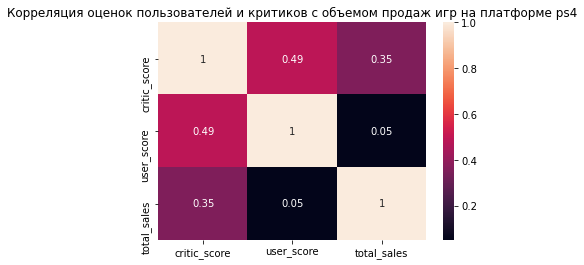

In [132]:
sns.heatmap(data=data_corr_ps4, annot=True)
plt.title('Корреляция оценок пользователей и критиков с объемом продаж игр на платформе ps4')
plt.show()

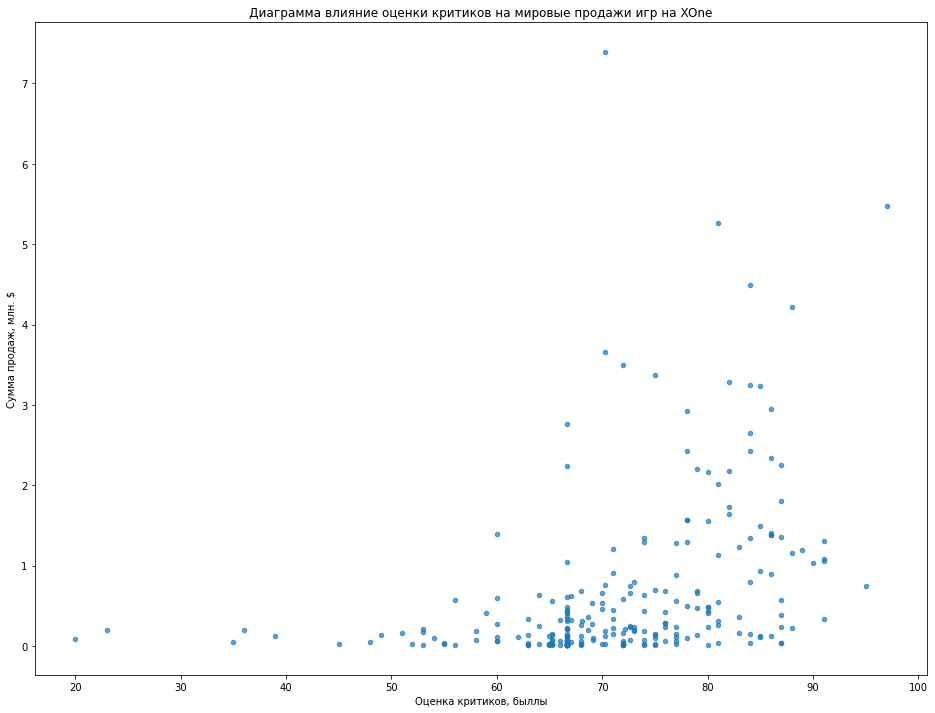

In [133]:
(
    new_data
        .query('platform == "XOne"')
        .plot(kind='scatter', 
              x='critic_score', 
              y='total_sales', 
              alpha=.7,
              figsize=(16, 12))
        
)
plt.title('Диаграмма влияние оценки критиков на мировые продажи игр на XOne')
plt.xlabel('Оценка критиков, быллы')
plt.ylabel('Сумма продаж, млн. $');

In [134]:
data_corr_XOne = new_data.query('platform == "XOne"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()
data_corr_XOne

,critic_score,user_score,total_sales
critic_score,1.000000,0.403280,0.382537
user_score,0.403280,1.000000,0.079864
total_sales,0.382537,0.079864,1.000000


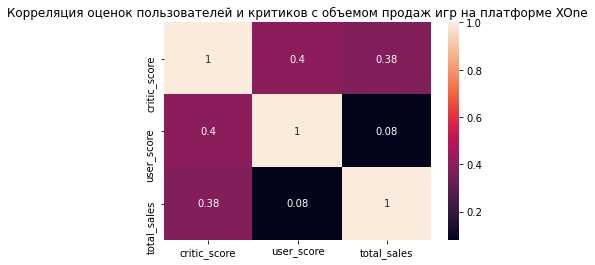

In [135]:
sns.heatmap(data=data_corr_XOne, annot=True)
plt.title('Корреляция оценок пользователей и критиков с объемом продаж игр на платформе XOne')
plt.show()

#### Наблюдаем незначительную корреляцию между оценками критиков и суммами продаж по платформе, которой можно принебречь. Корреляции по продажам и оценкам пользователей нет.

In [136]:
def scores(data, profit_platform):
    
    for platform in profit_platform:
        print(platform)
        data = new_data.query('platform == @platform')[['critic_score', 'user_score', 'total_sales']].corr()
        print(data)
        print()
        plt.figure()
        sns.heatmap(data=data, annot=True)
        plt.title('Платформа: ' + platform)

PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.489940     0.354686
user_score        0.489940    1.000000     0.050159
total_sales       0.354686    0.050159     1.000000

XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.403280     0.382537
user_score        0.403280    1.000000     0.079864
total_sales       0.382537    0.079864     1.000000

3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.375861     0.258847
user_score        0.375861    1.000000     0.206937
total_sales       0.258847    0.206937     1.000000

WiiU
              critic_score  user_score  total_sales
critic_score      1.000000    0.484628     0.335322
user_score        0.484628    1.000000     0.347580
total_sales       0.335322    0.347580     1.000000



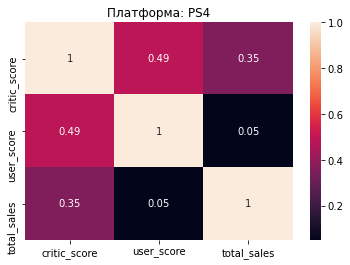

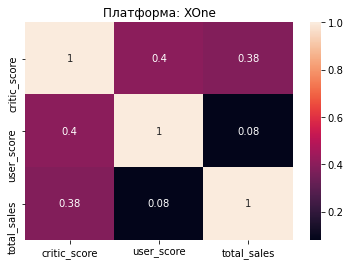

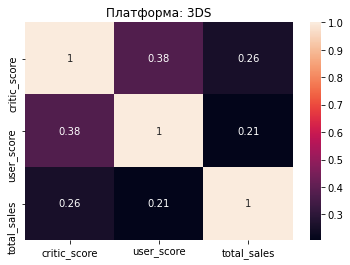

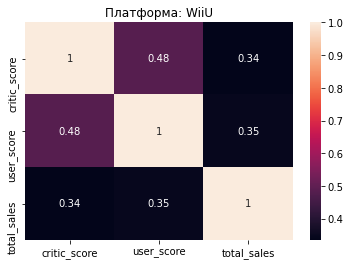

In [137]:
scores(new_data, profit_platform)

Результаты по платформам XOne и PS4 : между продажами и оценками критиков присутствует слабая связь (Коэффициенты корреляции 0,35 и 0,38), по оценкам пользователей корреляции не наблюдается.
Результаты по платформам 3DS и WiiU : между продажами и оценками критиков присутствует  слабая связь (Коэффициенты корреляции 0,26 и 0,34), по оценкам пользователей также корреляция слабая (Коэффициенты корреляции 0,21 и 0,35) 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [186]:
genre_games_count = new_data['genre'].value_counts().reset_index().rename(columns={'index':'genre','genre':'count'})
genre_games_count

,genre,count
0,Action,480
1,Role-Playing,159
2,Sports,117
3,Misc,115
4,Shooter,95
5,Adventure,82
6,Platform,62
7,Racing,52
8,Fighting,44
9,Simulation,40


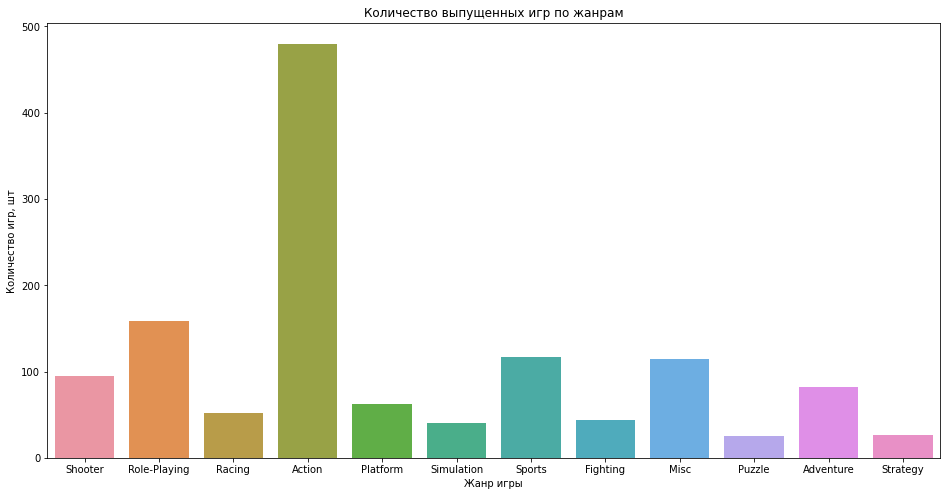

In [187]:
plt.figure(figsize=(16, 8))
sns.countplot(x='genre', data = new_data)
plt.title('Количество выпущенных игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр, шт');

In [203]:
genre_sales = ( 
    new_data
        .pivot_table(index='genre', 
                     values='total_sales', 
                     aggfunc={'count', 'sum', 'median'})
        .reset_index()
        .rename(columns={'count': 'count_of_games', 'sum': 'total_sales_of_genre'})
        .sort_values('total_sales_of_genre', ascending=False)

)
genre_sales

,genre,count_of_games,median,total_sales_of_genre
0,Action,480,0.130,210.32
8,Shooter,95,0.680,156.12
7,Role-Playing,159,0.230,126.63
10,Sports,117,0.260,91.66
4,Platform,62,0.255,62.68
6,Racing,52,0.235,44.67
3,Misc,115,0.150,39.07
9,Simulation,40,0.175,29.08
2,Fighting,44,0.180,27.93
1,Adventure,82,0.070,14.02


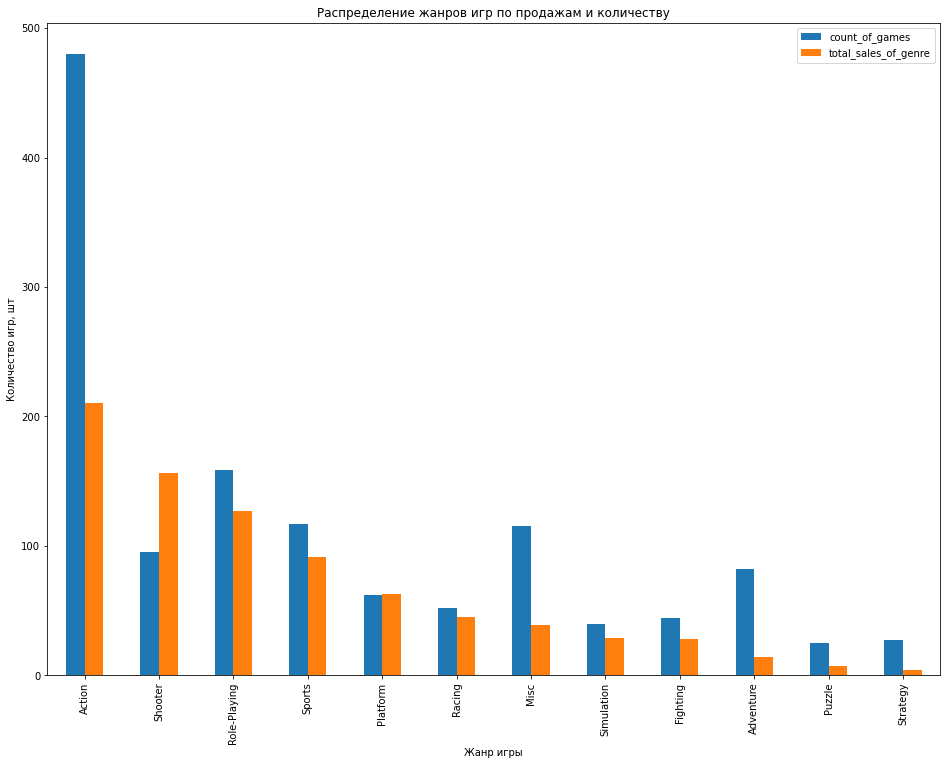

In [220]:
genre_sales[['genre','count_of_games', 'total_sales_of_genre']].plot(x='genre', kind='bar', figsize=(16,12))
plt.title('Распределение жанров игр по продажам и количеству')
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр, шт');

#### Самыми прибыльными жанрами Action, Shooter, Role-Playing. Практически в 2 раза от Action отстает жанр Sports. Прибыль игр жанра Action - 210 млн. $, Прибыль игр жанра Shooter - 156 млн.$,  Прибыль игр жанра 	Role-Playing	 - 126 млн. $. Самое высокое медианное значение продаж (0.680) у игр жанра Shooter. Исходя из графика можно заметить, что наибольшая отдача от 1 игры (отношение количества выпущенных игр по жанру к продажам) больше у игр жанра Role-Playing (из самых прибыльных).

# Шаг 4. Составьте портрет пользователя каждого региона
> Определите для пользователя каждого региона (NA, EU, JP):  
    > Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
    > Самые популярные жанры (топ-5). Поясните разницу.  
    > Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

In [226]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

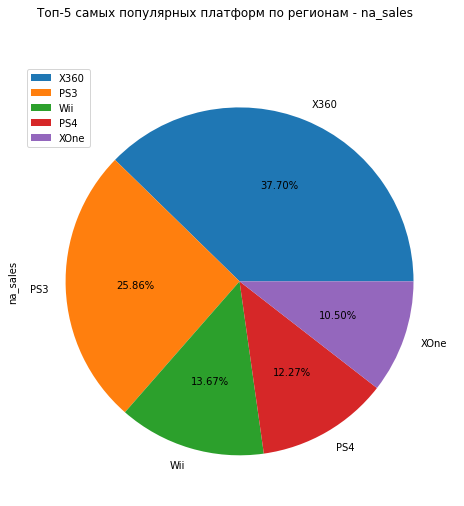

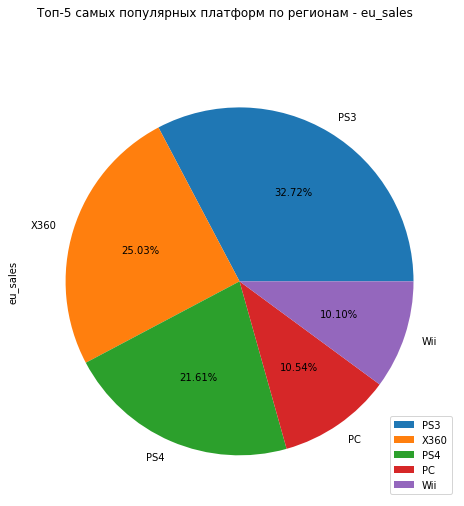

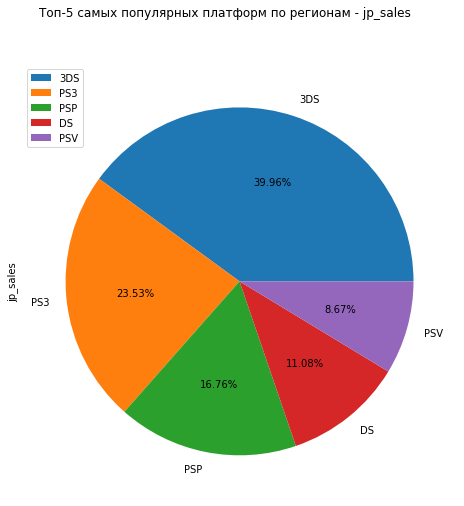

In [264]:
for region in regions:
    (
        games
            .query('2010 <= year_of_release <= 2016')
            .pivot_table(index='platform', 
                         values=region,
                         aggfunc='sum')
            .sort_values(region, ascending=False)
            .head()
            .plot(kind='pie', 
                  subplots=True, 
                  autopct='%0.2f%%',
                  figsize=(16, 8), 
                  title = 'Топ-5 самых популярных платформ по регионам - ' + region)
    )

#### Предпочтения в игровых платформах схлжи у пользователей Северной Америки и Европы. В Японии предпочитают портативные консоли. В Европе самая популярная платформа PS3, в Серверной Америке - X360. В Европе, практически в  раза чаще выбирают PS4, чем в Америке. Если в Японии самая популярная платформа 3DS, то в Европе и Северной Америке она не входит в топ-5.

### Самые популярные жанры (топ-5). Поясните разницу.

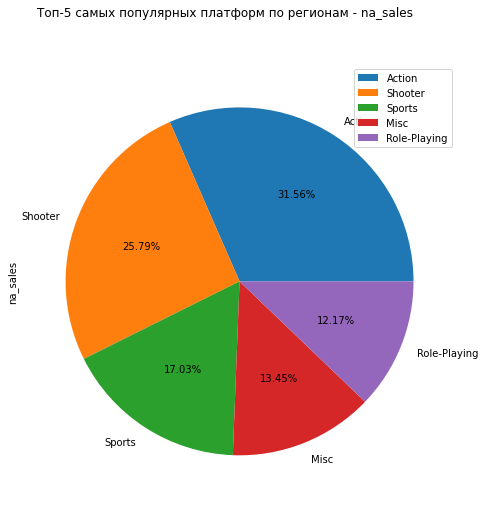

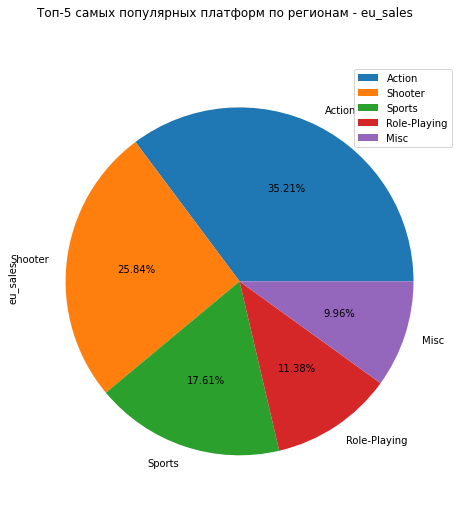

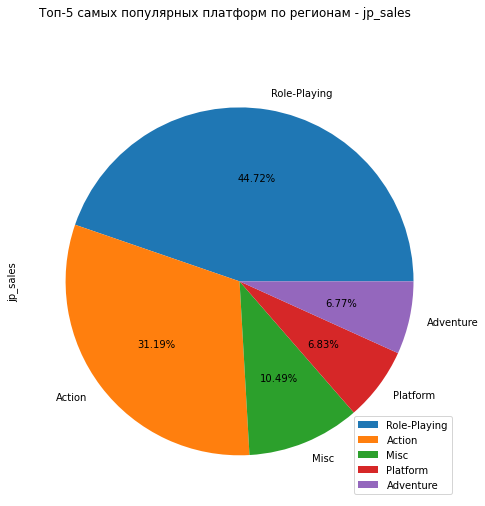

In [267]:
for region in regions:
    (
        games
            .query('2010 <= year_of_release <= 2016')
            .pivot_table(index='genre', 
                         values=region,
                         aggfunc='sum')
            .sort_values(region, ascending=False)
            .head()
            .plot(kind='pie', 
                  subplots=True, 
                  autopct='%0.2f%%',
                  figsize=(16, 8), 
                  title = 'Топ-5 самых популярных платформ по регионам - ' + region)
    )

#### Предпочтения по жанрам у пользователей Серерной Америки и Европы идентичны: В топ-5 жанров входят Action, Shooter, Sports, Role-Playing, Misc. В тоже время можно наблюдать, что предпочтения пользователей отличаются: больше всего онилюбят игры в жанре Role-Playing. При этом такого популярного жанра в NA и EU как Shooter нет в топ-5.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Типы значений рейтинга ESRB:
 1. «EC» («Early childhood») — «Для детей младшего возраста»
 2. «E» («Everyone») — «Для всех»
 3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 4. «T» («Teen») — «Подросткам»
 5. «M» («Mature») — «Для взрослых»
 6. «AO» («Adults Only 18+») — «Только для взрослых»
 7. «RP» («Rating Pending») — «Рейтинг ожидается»

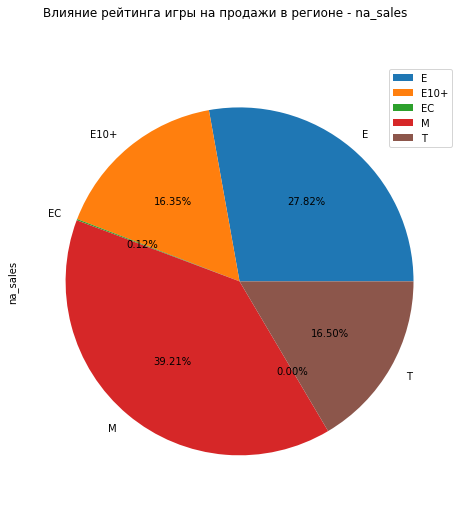

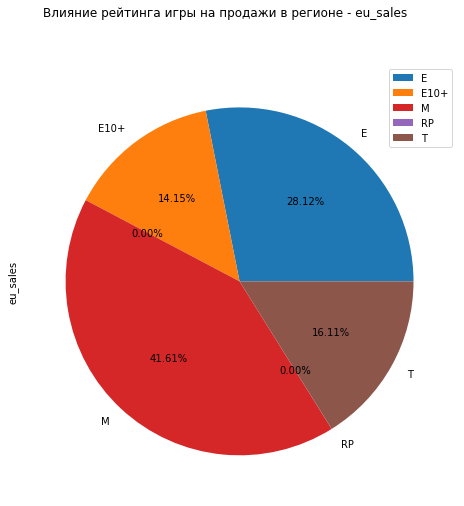

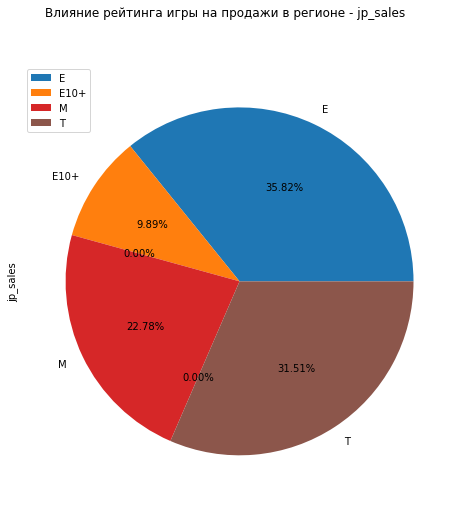

In [287]:
for region in regions:
    (
    games
        .query('2010 <= year_of_release <= 2016 and rating != ""')
        .pivot_table(index='rating',
                    values=region,
                    aggfunc='sum')
        .plot(kind='pie', 
              subplots=True, 
              autopct='%0.2f%%', 
              figsize=(16, 8),
              title='Влияние рейтинга игры на продажи в регионе - ' + region)
    
     )

#### В Европе и Северной Америке большая часть продаж приходится на игры в категрии для взрослых пользователей, в то время как в Японии большая часть игр имеет рейтинг для всех и для подростков. Рейтинг для всех в Европе и Северной Америке на втором месте.

#### Портреты пользователей:
    
    1. Регион "Северная Америка"
    
    Самая популярная платформа - X360, на втором месте с разницей в 12% процентов от первого - PS3. В сумме 2 платформы занимают более 50% рынка
    Самый популярный жанр - Action, немного уступает в популярности жанр Shooter.
    Большинcтво игр имеют рейтинг - для взрослых
    
    2.  Регион "Европа"
    
    Самая популярная платформа - PS3 (32% рынка), на втором месте X360(25% рынка). Немного уступает второму месту PS4 (22% рынка)
    Самый популярный жанр - Action (35% рынка), Shooter (25% рынка).
    Большинcтво игр имеют рейтинг - для взрослых
    
    3.  Регион "Япония"
    
    Самая популярная платформа - 3DS (40% рынка).
    Самый популярный жанр - Role-Playing (45% рынка), Action (31% рынка). Занимают более 75% рынка.
    Большинcтво игр имеют рейтинг - "Для всех" и "Подросткам"

# Шаг 5. Проверьте гипотезы

   > Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
   > Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

#### Формулируем нулевую H₀ гипотезу как: "Средние пользовательские рейтинги платформ Xbox One и PC не различаются". Альтернативная H₁ гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC различаются". 

In [469]:
games_XOne = ( 
    games
        .query('2010 <= year_of_release <= 2016 and platform == "XOne"')
)
games_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,70.260022,6.383200,,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.000000,7.900000,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.000000,5.400000,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.000000,6.400000,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.000000,6.200000,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.000000,8.200000,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,71.993133,6.600000,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,66.676931,5.857856,,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.000000,6.700000,,0.01


In [471]:
games_PC = ( 
    games
        .query('2010 <= year_of_release <= 2016 and platform == "PC"')
)
games_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.000000,4.000000,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.0,0.58,93.000000,8.200000,T,4.83
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,1.16,2.12,0.0,0.60,94.000000,8.100000,M,3.88
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.000000,3.900000,T,3.05
480,Star Wars: The Old Republic,PC,2011.0,Role-Playing,1.58,1.01,0.0,0.38,85.000000,5.900000,T,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.0,0.00,68.006897,5.161655,,0.01
16678,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.0,0.00,72.158784,6.467442,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.0,0.00,80.000000,7.600000,M,0.01
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.0,0.00,61.000000,5.800000,T,0.01


#### Проверим дисперсии двух выборок

Проверка выборок на нормальность. Тест Шапиро-Уилка позволяет проверить выборки на нормальность.

Если по результатам применения теста мы видим, что нормальность соблюдается, мы используем для проверки равенства (гомогенности) дисперсий тест Бартлета (проверка на равенство дисперсий двух нормально распределенных выборок)

В противном случае - тест Левена.

И затем уже мы устанавливаем значение параметра equal_var ttest_ind.

In [472]:
alpha = .05

#### Проведем тест Шапиро-Уилка по первой выборке

In [473]:
games_PC_u_score = games_PC['user_score']

In [474]:
shapiro_games_PC = st.shapiro(games_PC_u_score)
shapiro_games_PC

ShapiroResult(statistic=0.8966906070709229, pvalue=1.87859334555693e-17)

In [475]:
if shapiro_games_PC.pvalue < alpha:
    print('Отклоняем нулевую гипотезу о нормальном распределении выборок.')
else:
    print('Принимаем нулевую гипотезу о нормальном распределении выборок.')

Отклоняем нулевую гипотезу о нормальном распределении выборок.


#### Проведем тест Шапиро-Уилка по второй выборке

In [476]:
games_Xone_u_score = games_XOne['user_score']
games_Xone_u_score

99       6.383200
165      7.900000
179      5.400000
242      6.400000
270      6.200000
           ...   
16630    8.200000
16643    6.600000
16645    5.857856
16660    6.700000
16672    0.000000
Name: user_score, Length: 247, dtype: float64

In [477]:
shapiro_games_XOne = st.shapiro(games_Xone_u_score)

In [478]:
if shapiro_games_XOne.pvalue < alpha:
    print('Отклоняем нулевую гипотезу о нормальном распределении выборок.')
else:
    print('Принимаем нулевую гипотезу о нормальном распределении выборок.')

Отклоняем нулевую гипотезу о нормальном распределении выборок.


#### По результатам применения теста видим, что нормальность в 2-х выборках не соблюдается. Используем для проверки равенства (гомогенности) дисперсий тест Левена (проверка на равенство дисперсий двух не нормально распределенных выборок).

In [479]:
barlett_games_Xone = st.levene(games_Xone_u_score, games_PC_u_score, center='mean')
barlett_games_Xone

LeveneResult(statistic=7.975643925196152, pvalue=0.004871425262243863)

In [480]:
games_Xone_u_score.var()

3.4324091059786563

In [481]:
games_PC_u_score.var()

4.336670397434408

#### Исходя из теста Левена предполагаем что дисперсии разные, поэтому будем в критерии Стьюдента брать параметр equal_var = False

In [482]:
results = st.ttest_ind(games_Xone_u_score, games_PC_u_score, equal_var=False)
results

Ttest_indResult(statistic=0.43159552786110295, pvalue=0.6662043323052421)

In [483]:
print('p_value:', results.pvalue)

p_value: 0.6662043323052421


In [485]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

Не получилось отвергнуть нулевую гипотезу.


##### Вероятность слишком высокая, чтобы сделать вывод о значимом различии между пользовательскими оценками платформ Xbox One и PC.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##### Формулируем нулевую H₀ гипотезу как: "Средние пользовательские рейтинги жанров Action и Sports не различаются(одинаковые)". Альтернативная H₁ гипотеза звучит так: "Средние пользовательские рейтинги рейтинги жанров Action и Sports различаются(разные)". 

In [454]:
genre_action_score = (
    games
        .query('2010 <= year_of_release <= 2016 and genre == "Action"')
    ['user_score']
)
genre_action_score

16       8.200000
23       8.100000
42       8.300000
81       6.600000
118      8.300000
           ...   
16680    5.857856
16691    5.857856
16692    7.600000
16699    5.857856
16710    5.857856
Name: user_score, Length: 1495, dtype: float64

In [455]:
genre_sports_score = (
    games
        .query('2010 <= year_of_release <= 2016 and genre == "Sports"')
    ['user_score']
)
genre_sports_score 

77       4.300000
94       5.000000
119      0.000000
122      5.053463
126      4.300000
           ...   
16534    0.000000
16562    0.000000
16638    0.000000
16643    6.600000
16688    0.000000
Name: user_score, Length: 575, dtype: float64

#### Проведем тест Шапиро-Уилка по первой выборке

In [456]:
shapiro_genre_action_score = st.shapiro(genre_action_score)
shapiro_genre_action_score

ShapiroResult(statistic=0.7653805613517761, pvalue=8.30829859498184e-42)

In [445]:
if shapiro_genre_action_score.pvalue < alpha:
    print('Отклоняем нулевую гипотезу о нормальном распределении выборок.')
else:
    print('Принимаем нулевую гипотезу о нормальном распределении выборок.')

Отклоняем нулевую гипотезу о нормальном распределении выборок.


#### Проведем тест Шапиро-Уилка по второй выборке

In [460]:
shapiro_genre_sports_score = st.shapiro(genre_sports_score)
shapiro_genre_sports_score

ShapiroResult(statistic=0.8615734577178955, pvalue=4.171121852542039e-22)

In [461]:
if shapiro_genre_sports_score.pvalue < alpha:
    print('Отклоняем нулевую гипотезу о нормальном распределении выборок.')
else:
    print('Принимаем нулевую гипотезу о нормальном распределении выборок.')

Отклоняем нулевую гипотезу о нормальном распределении выборок.


#### По результатам применения теста видим, что нормальность в 2-х выборках не соблюдается. Используем для проверки равенства (гомогенности) дисперсий тест Левена (проверка на равенство дисперсий двух не нормально распределенных выборок).

In [462]:
levene = st.levene(genre_action_score, genre_sports_score, center='mean')

In [463]:
alpha > levene.pvalue

True

#### Исходя из теста Левена предполагаем что дисперсии разные, поэтому будем в критерии Стьюдента брать параметр equal_var = False

In [464]:
results1 = st.ttest_ind(genre_action_score, genre_sports_score, equal_var = False)

In [465]:
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\nСредние пользовательские рейтинги жанров Action и Sports различаются(разные)')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\nСредние пользовательские рейтинги жанров Action и Sports не различаются(одинаковые)')

Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги жанров Action и Sports различаются(разные)


# Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

### Анализ данных

1. В ходе работы над проектом был предоставлен датасет с данными о видеоиграх с датой выхода с 1980 по 2016 год. Проведена первичные предобработка данных, которая показала, что имеются неверно указанные типы данных, отсутсующие строки.
Данные были заменены, в некотрых случаях очищены.  

### Выбор данных для анализа

2. В ходе анализа было выяснено, что средний срок жизни платформы составляет 10 лет. На 5-7 год получаются максимальные продажи. В качестве прогнозного был взят период с 2010-2016гг.

### Анализ рынка  

3. **Самый большой рынок по объему продаж - Северная Америка, с результатом 4,3 млрд.$, второй по выручке рынок - Европа (2,4 млрд.$), Япония практически в 2 раза меньше рынка Европы - 1,3 млрд.$**

4. Платформы PS4 и XOne являются самыми перспективными на период исследования данных. Они находятся на начальном этапе жизненного цикла. Также в качестве сравниваемых платформ были выбраны WiiU и 3Ds, которые наиболее популярны в Японии. При этом продажи 3Ds падают с 2013 года. Но **падение продаж характерны для всех игровых платформ, вероятно из-за роста популярности мобильных приложений.**

### Сравнение платформ  

5. Среди конкуриющих компаний (PS и XBox) было несколько выпущенных игр на обеих платформах. Выполненный анализ данных показал, что игра впущенная на **PS4 будет популярней, той же игры на XOne**. Причем разница во многих случаях в 2 раза. 
Лидерами продаж являются платформы PS4 и 3DS.

### Рейтинги  

6. Результаты по платформам XOne и PS4 : между продажами и оценками критиков присутствует слабая связь (Коэффициенты корреляции 0,35 и 0,38), по оценкам пользователей корреляции не наблюдается. Результаты по платформам 3DS и WiiU : между продажами и оценками критиков присутствует слабая связь (Коэффициенты корреляции 0,26 и 0,34), по оценкам пользователей также корреляция слабая (Коэффициенты корреляции 0,21 и 0,35)

### Популярность жанров  

7. Предпочтения по жанрам у пользователей Серерной Америки и Европы идентичны: **В топ-5 жанров входят Action, Shooter, Sports, Role-Playing, Misc.** В тоже время можно наблюдать, что предпочтения пользователей Японии отличаются: больше всего они любят игры в жанре Role-Playing. При этом такого популярного жанра в NA и EU как Shooter нет в топ-5.
**При этом игры в жанре Shooter имеют высокое медианное значение продаж = 0, 68 млн$, в то время как, например, Strategy всего 0,08**.

### Предпочтения в игровых платформах   

8. Предпочтения в игровых платформах схожи у пользователей Северной Америки и Европы. В Японии предпочитают портативные консоли. В Европе самая популярная платформа PS3, **в Серверной Америке - X360**. **В Европе, практически в 2 раза чаще выбирают PS4**, чем в Америке. Если в Японии самая популярная платформа 3DS, то в Европе и Северной Америке она не входит в топ-5.
**Самая популярная платформа в каждом из регионов занимает примерно 30-40% от всего рынка.**

### Влияние категорий на продажи  

9. **В Европе и Северной Америке большая часть продаж (свыше 50%) приходится на игры в категрии рейтингом M** (для взрослых пользователей). Рейтинг для всех в Европе и Северной Америке на втором месте.**В Японии 90% игр имеет рейтинг E, T, M** (для всех, для подростков, взрослые). 

### Гипотезы

10. Были проверены две гипотезы: Средние оценки пользователей платформ Xbox One и ПК совпадают. Нулевая гипотеза не была отвергнута, и в итоге невозможно сказать, одинаковые они или разные. Средние оценки пользователей жанров «Action» и «Sports» различаются. Нулевая гипотеза была отвергнута, и была принята альтернативная гипотеза о том, что эти рейтинги разные.



## Рекомендации:

Исходя из выше описанных выводов условно можно сделать вывод, что следует выбирать наиболее емкие рынки по продажам, на наиболе популярных платформах, с популярными жанрами.

#### Предпочтительные параметры:

**Северная Америка:**   
**Жанры:** Action, Shooter, Sports  
**Платформы:** PS4, XOne   
**Рейтинги ESRB:** M, E  
**Оценка критиков имеет слабое влияние на продажи.**   

**Европа:**  
**Жанры:** Action, Shooter, Sports  
**Платформы:** PS4   
**Рейтинги ESRB:** M, E  
**Оценка критиков имеет слабое влияние на продажи.**   

**Япония:**   
**Жанры:** Role-Playing, Action   
**Платформы:** 3DS  
(PS3 не внес в список из-за выхода более современной платформы PS4)  
**Рейтинги ESRB:** E, T   
**Оценка критиков и пользователей имеет слабое влияние на продажи.**   
